In [2]:
#Predicted value is categorical (classification)
#Sigmoid / Logit Function

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [4]:
df = pd.read_csv("houses.csv")
df

,title,house_type,price,size,construction_costs
0,Dom w papawerach 2,"jednorodzinny z poddaszem, z garażem jednostan...",3930,128,331800
1,Domek letniskowy w krokusach 4 (A),Domek letniskowy parterowy,2300,25,74400
2,Domek letniskowy w krokusach 5,Domek letniskowy parterowy,2300,25,83500
3,Domek letniskowy w krokusach 4,Domek letniskowy parterowy,2300,36,95300
4,Domek letniskowy pod laskiem,Domek letniskowy parterowy,2300,38,96800
...,...,...,...,...,...
731,Dom w firletkach,"jednorodzinny z poddaszem, z garażem jednostan...",3930,137,278600
732,Dom w zdrojówkach 12,"jednorodzinny z poddaszem, z garażem jednostan...",3930,129,278700
733,Dom w renklodach 26 (G),"jednorodzinny parterowy, z garażem jednostanow...",3600,140,279000
734,Dom w balsamowcach (A),"jednorodzinny z poddaszem, z garażem jednostan...",3930,124,279200


In [5]:
dummies = pd.get_dummies(df.house_type)
merged = pd.concat([df, dummies], axis = 'columns')

In [9]:
merged['garage']= merged[['jednorodzinny parterowy, z garażem jednostanowiskowym',
       'jednorodzinny parterowy, z garażem jednostanowiskowym, ze stropem teriva',
       'jednorodzinny piętrowy, z garażem jednostanowiskowym',
       'jednorodzinny z poddaszem, z garażem dwustanowiskowym',
       'jednorodzinny z poddaszem, z garażem jednostanowiskowym',
       'jednorodzinny z poddaszem, z garażem jednostanowiskowym, ze stropem teriva']].sum(axis=1)

df = merged.drop(['jednorodzinny parterowy, z garażem jednostanowiskowym',
       'jednorodzinny parterowy, z garażem jednostanowiskowym, ze stropem teriva',
       'jednorodzinny piętrowy, z garażem jednostanowiskowym',
       'jednorodzinny z poddaszem, z garażem dwustanowiskowym',
       'jednorodzinny z poddaszem, z garażem jednostanowiskowym',
       'jednorodzinny z poddaszem, z garażem jednostanowiskowym, ze stropem teriva', 
       'Domek letniskowy parterowy', 'Domek letniskowy z poddaszem',
       'jednorodzinny parterowy',
       'jednorodzinny piętrowy',
       'jednorodzinny z poddaszem',
       'jednorodzinny z poddaszem, z piwnicą',
       'jednorodzinny z poddaszem, ze stropem teriva',
        'title', 'house_type'], axis = 1)

In [10]:
df.to_csv('houses_with_garage_calssification.csv', index=False)

In [7]:
df['construction_costs_k'] = df['construction_costs']/1000
df

,price,size,construction_costs,garage,construction_costs_k
0,3930,128,331800,1,331.8
1,2300,25,74400,0,74.4
2,2300,25,83500,0,83.5
3,2300,36,95300,0,95.3
4,2300,38,96800,0,96.8
...,...,...,...,...,...
731,3930,137,278600,1,278.6
732,3930,129,278700,1,278.7
733,3600,140,279000,1,279.0
734,3930,124,279200,1,279.2


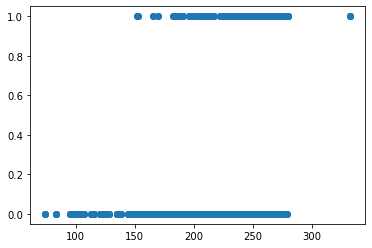

In [98]:
plt.scatter(df.construction_costs_k, df.garage)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(df[['construction_costs_k']], df.garage , train_size = 0.2)

In [122]:
model = LogisticRegression()
#Model training
model.fit(X_train, y_train)

LogisticRegression()

In [132]:
#Predictions

In [124]:
model.score(X_test, y_test)

0.7402376910016978

In [130]:
model.predict_proba(X_test)

array([[0.88266286, 0.11733714],
       [0.39119936, 0.60880064],
       [0.61566033, 0.38433967],
       ...,
       [0.91157937, 0.08842063],
       [0.25880136, 0.74119864],
       [0.70434264, 0.29565736]])

In [151]:
model.predict([[555]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])